# Hackathon: Building a Movie Recommendation System

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
tags = pd.read_csv('/content/tags.csv')
links = pd.read_csv('/content/links.csv')

### Shape of Movies Dataset

In [3]:
movies.shape

(9742, 3)

### shape of ratings data

In [4]:
ratings.shape

(100836, 4)

### unique "userId" are available in "ratings"


In [8]:
ratings['userId'].nunique()

#or
# len(ratings['userId'].unique())


610

### Which movie has recieved maximum number of user ratings


In [16]:
# Merging the 2 datasets based on movieId
merged_rm = pd.merge(ratings, movies, on='movieId')

# Perform groupby to get the total ratings count
ratings_count = merged_rm.groupby('title').size()

# Sort in desc order to get the maximum number of user ratings
ratings_count.sort_values(ascending=False).head(1)

title
Forrest Gump (1994)    329
dtype: int64

### Select all the correct tags submitted by users to "Matrix, The (1999)" movie

In [20]:
# Filter 'movies' for 'Matrix, The (1999)'
matrix_movie = movies[movies['title'] == 'Matrix, The (1999)']

# Merge 'matrix_movie' with 'tags'
merged_mt = pd.merge(matrix_movie, tags, on='movieId', how='inner')

# Select and display unique tags submitted by users for 'Matrix, The (1999)'
matrix_tags = merged_mt['tag'].unique()

print(f"The tags submitted by users for 'Matrix, The (1999)' are:")
for tag in matrix_tags:
    print(tag)


The tags submitted by users for 'Matrix, The (1999)' are:
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)

In [29]:
# Filter 'movies' for "Terminator 2: Judgment Day (1991)"
terminator_movie = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']

# Merge 'terminator_movie' with 'ratings'
merged_tr = pd.merge(terminator_movie, ratings, on='movieId', how='inner')

avg_rating = merged_tr['rating'].mean()
avg_rating


3.970982142857143

### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like

<Axes: ylabel='Density'>

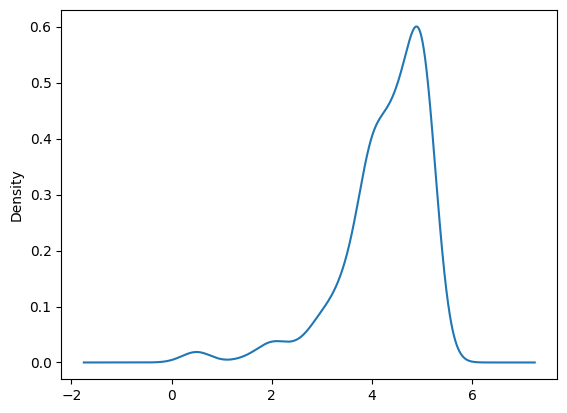

In [35]:
# Filter 'movies' for "Fight Club (1999)"
fc_movie = movies[movies['title'] == 'Fight Club (1999)']

# Merge 'fc_movie' with 'ratings'
merged_fcr = pd.merge(fc_movie, ratings, on='movieId', how='inner')

# distribution
merged_fcr['rating'].plot(kind='kde')

### Which movie is the most popular based on  average user ratings


In [40]:
# Group ratings by movieId and calculate count and mean
ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Inner join movies and the grouped ratings dataframe
merged_data = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

# Filter movies with more than 50 user ratings
popular_movies = merged_data[merged_data['count'] > 50]

# Find the movie with the highest average rating among popular movies
most_popular_movie = popular_movies.loc[popular_movies['mean'].idxmax()]

# Output the most popular movie based on average user ratings
print(f"The most popular movie based on average user ratings is '{most_popular_movie['title']}' with an average rating of {most_popular_movie['mean']:.2f}.")


The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43.


### 5 popular movies based on number of user ratings.

In [42]:
# Group ratings by movieId and calculate count of ratings
ratings_count = ratings.groupby('movieId')['rating'].count().reset_index()

# Merge movies with ratings count
merged_data = pd.merge(movies, ratings_count, on='movieId', how='inner')

# Rename the columns for clarity
merged_data.rename(columns={'rating': 'rating_count'}, inplace=True)

# Sort movies by rating count in descending order
sorted_movies = merged_data.sort_values(by='rating_count', ascending=False)

# Get the top 5 popular movies based on number of user ratings
top_5_popular_movies = sorted_movies.head(5)

# Display top 5 popular movies
print(top_5_popular_movies[['title', 'rating_count']])


                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [43]:
# Filter movies dataset for Sci-Fi genre
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi')]

# Group ratings by movieId and count the number of ratings
ratings_count = ratings.groupby('movieId')['rating'].count().reset_index()

# Merge Sci-Fi movies with ratings count
merged_data = pd.merge(sci_fi_movies, ratings_count, on='movieId', how='inner')

# Rename the columns for clarity
merged_data.rename(columns={'rating': 'rating_count'}, inplace=True)

# Sort Sci-Fi movies by rating count in descending order
sorted_sci_fi_movies = merged_data.sort_values(by='rating_count', ascending=False)

# Get the third most popular Sci-Fi movie based on number of user ratings
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]  # Index starts from 0

# Display the third most popular Sci-Fi movie
print(f"The third most popular Sci-Fi movie based on the number of user ratings is '{third_most_popular_sci_fi_movie['title']}' with {third_most_popular_sci_fi_movie['rating_count']} ratings.")


The third most popular Sci-Fi movie based on the number of user ratings is 'Jurassic Park (1993)' with 238 ratings.


### Mention the movieId of the movie which has the highest IMDB rating.

In [55]:
links = pd.read_csv('/content/links.csv')
highest_rm = links.loc[links['imdbId'].idxmax()]

print("Movie with the Highest IMDB Rating: ")
print(highest_rm[['movieId', 'imdbId']])

Movie with the Highest IMDB Rating: 
movieId     193587.0
imdbId     8391976.0
Name: 9740, dtype: float64


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [57]:
# Merge the movies and ratings dataset
merged_data = pd.merge(links, movies, on='movieId', how='inner')

# Filtering the rows where genres contains the sci fi
sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi')]

# Finding the highest rated sci-fi movie
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdbId'].idxmax()]

print("The Sci-Fi movie with the highest IMDb rating: ", highest_rated_sci_fi_movie['movieId'])

The Sci-Fi movie with the highest IMDb rating:  179053
